In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/lodetomasi1995/income-classification

In [3]:
df = pd.read_csv("income_evaluation.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
col_names = ["age", "workclass", "finalweight", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [8]:
df.columns = col_names

In [9]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe()

,age,finalweight,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [13]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]
    

In [14]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [15]:
numerical

['age',
 'finalweight',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [16]:
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [17]:
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [18]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

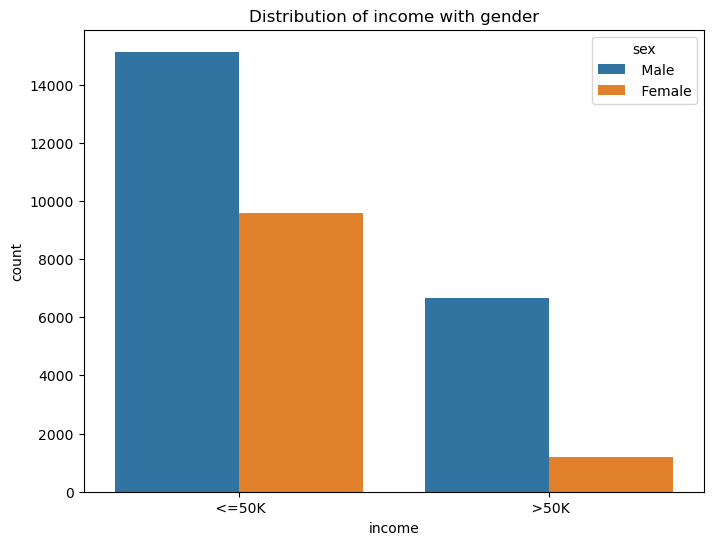

In [19]:
fig, ax = plt.subplots(figsize= (8,6))
ax = sns.countplot(x="income", hue="sex", data=df)
ax.set_title("Distribution of income with gender")
plt.show()

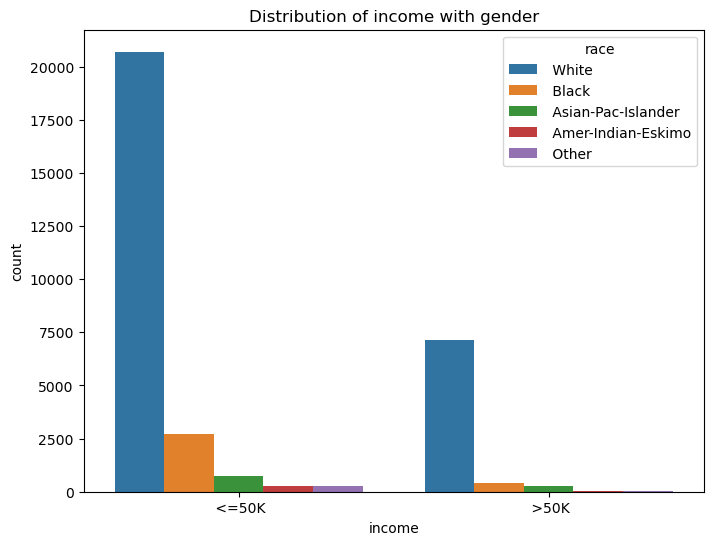

In [20]:
fig, ax = plt.subplots(figsize= (8,6))
ax = sns.countplot(x="income", hue="race", data=df)
ax.set_title("Distribution of income with gender")
plt.show()

In [21]:
 df.head()

,age,workclass,finalweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


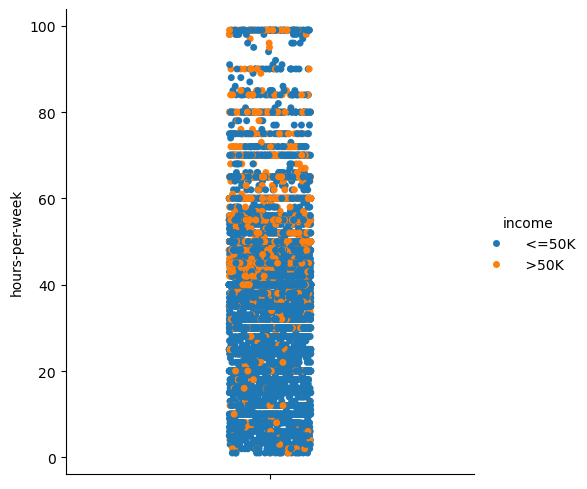

In [22]:
sns.catplot(y=df["hours-per-week"], hue=df["income"])
plt.show()

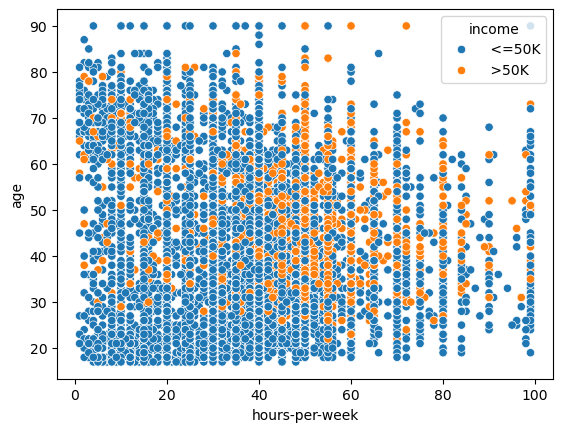

In [23]:
sns.scatterplot(x=df["hours-per-week"], y=df["age"], hue=df["income"])
plt.show()

In [24]:
over_40_hours = df[df["hours-per-week"] > 40]
under_40_hours = df[df["hours-per-week"] <= 40]

In [25]:
over_40_hours["income"].value_counts()

income
<=50K    5725
>50K     3856
Name: count, dtype: int64

In [26]:
under_40_hours["income"].value_counts()

income
<=50K    18995
>50K      3985
Name: count, dtype: int64

In [27]:
3856 / (3856+5725)

0.4024632084333577

In [28]:
3985 / (18995+3985)

0.17341166231505656

In [29]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [30]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [31]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [32]:
df["workclass"] = df["workclass"].replace(" ?", np.nan)

In [33]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [34]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [35]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [36]:
df["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [37]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [38]:
df["occupation"] = df["occupation"].replace(" ?", np.nan)

In [39]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [40]:
df["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [41]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [42]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [43]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [44]:
df["native-country"] = df["native-country"].replace(" ?", np.nan)

In [45]:
df.isnull().sum()

age                  0
workclass         1836
finalweight          0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

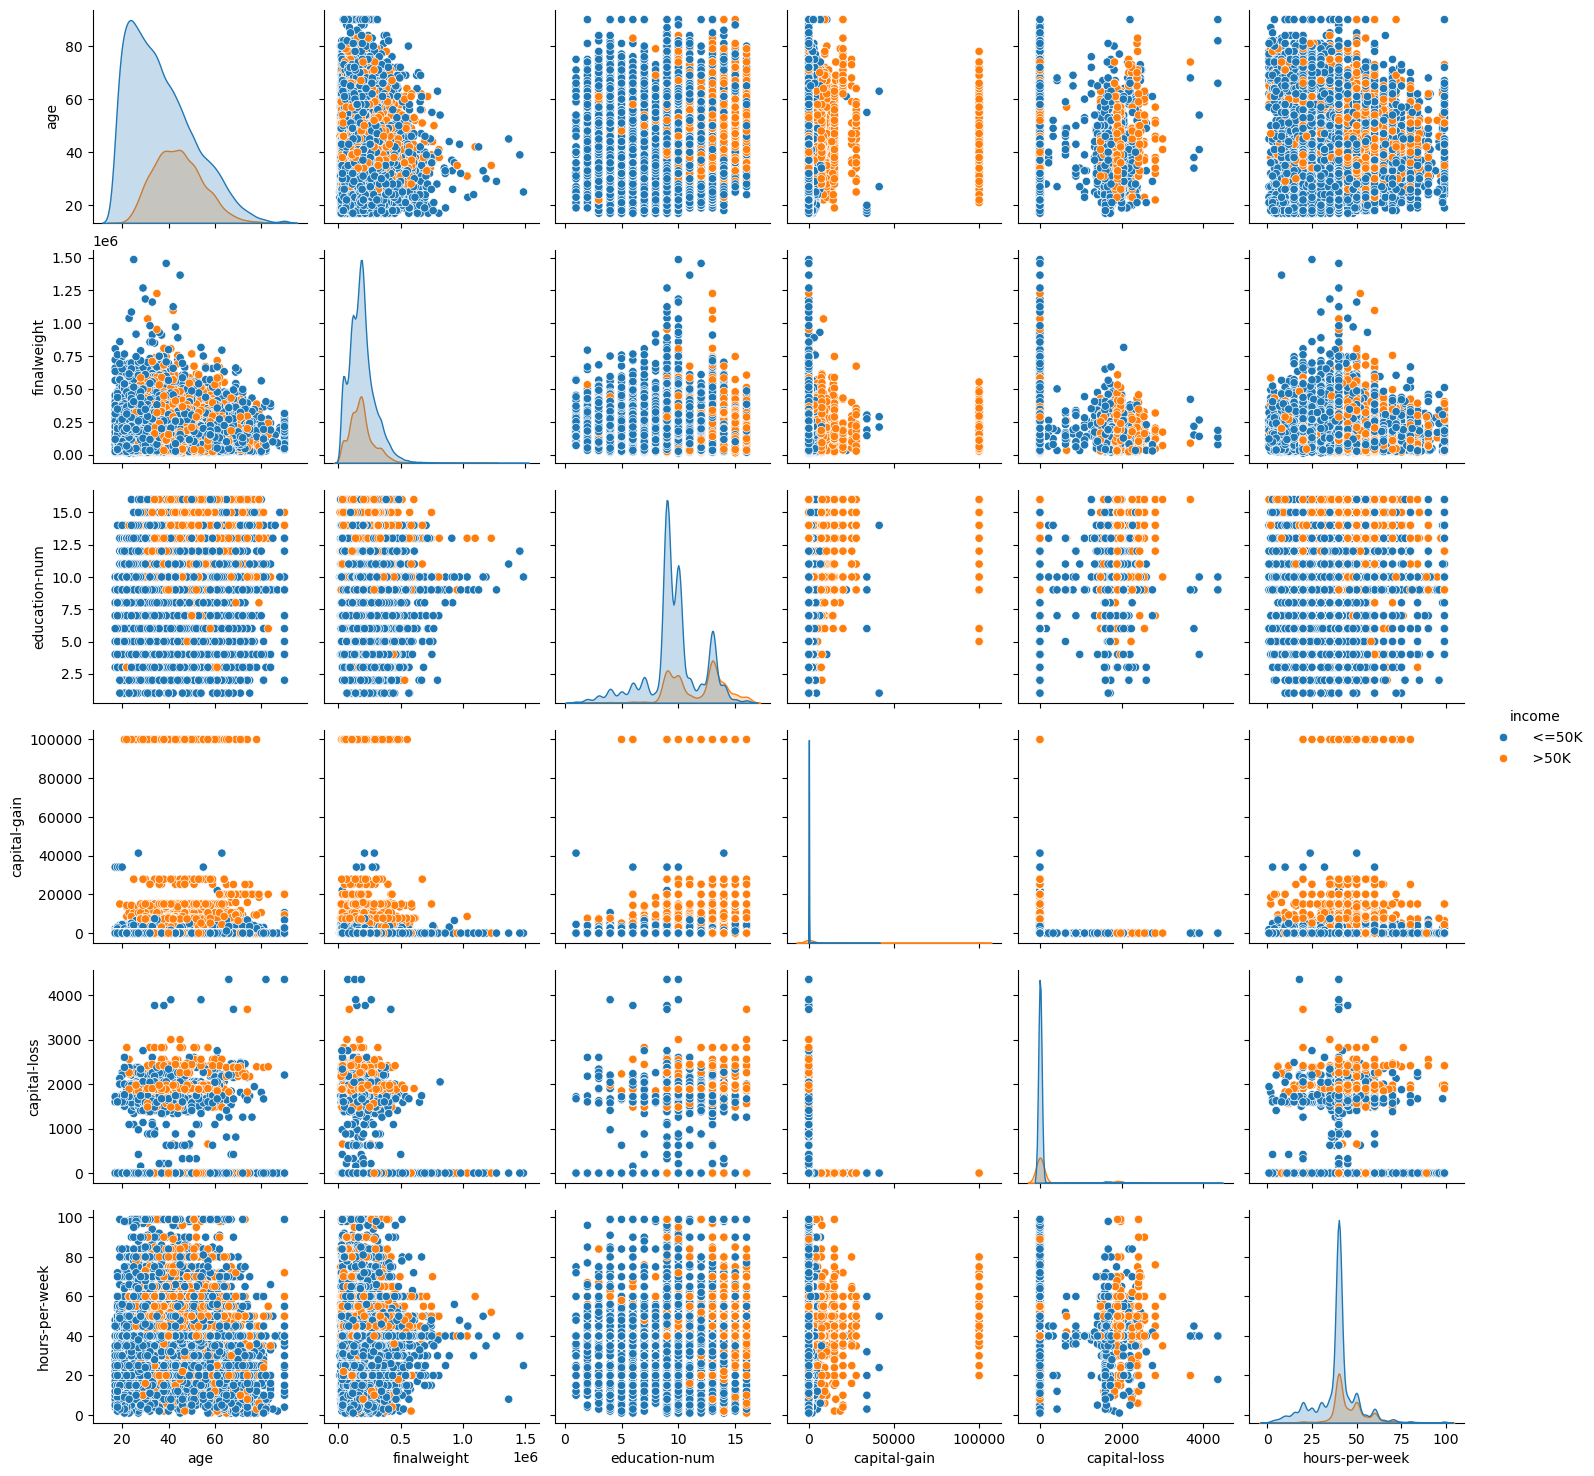

In [46]:
sns.pairplot(df, hue="income")
plt.show()

In [47]:
X = df.drop("income", axis=1)
y= df["income"]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]


In [50]:
X_train[categorical].isnull().sum()

workclass         1276
education            0
marital-status       0
occupation        1278
relationship         0
race                 0
sex                  0
native-country     414
dtype: int64

In [51]:
X_test[categorical].isnull().sum()

workclass         560
education           0
marital-status      0
occupation        565
relationship        0
race                0
sex                 0
native-country    169
dtype: int64

In [52]:
for i in [X_train, X_test]:
    i["workclass"] = i["workclass"].fillna(X_train["workclass"].mode()[0])
    i["occupation"] = i["occupation"].fillna(X_train["occupation"].mode()[0])
    i["native-country"] = i["native-country"].fillna(X_train["native-country"].mode()[0])
    

In [53]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [54]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [55]:
#encoding

In [56]:
X_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [57]:
df[categorical].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

In [58]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == ">50K" else 0)

In [59]:
target_means = y_train_binary.groupby(X_train["native-country"]).mean()

In [60]:
X_train["native-country-encoded"] = X_train["native-country"].map(target_means)
X_train["native-country-encoded"] = X_train["native-country-encoded"].fillna(y_train_binary.mean())

X_test["native-country-encoded"] = X_test["native-country"].map(target_means)
X_test["native-country-encoded"] = X_test["native-country-encoded"].fillna(y_train_binary.mean())

In [61]:
X_train.head()

,age,workclass,finalweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,native-country-encoded
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,0.245722
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States,0.245722
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0.245722
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,0.041667
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany,0.284091


In [62]:
X_train = X_train.drop("native-country", axis=1)
X_test = X_test.drop("native-country", axis=1)

In [63]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [64]:
one_hot_categories = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']
    

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [66]:
encoder = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False),one_hot_categories)
    ], remainder="passthrough"
)

In [67]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [69]:
X_train_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.        ,  0.24572168],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24572168],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        45.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24572168]])

In [71]:
columns= encoder.get_feature_names_out()

In [72]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__marital-status_ Divorced',
       'cat__marital-status_ Married-AF-spouse',
       'cat__marital-status_ Married-civ-spouse',
       'cat__marital-status_ Married-spouse-absent',
       'cat__marital-status_ Never-mar

In [73]:
X_train = pd.DataFrame(X_train_enc, columns = columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns = columns, index=X_test.index)

In [74]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country-encoded
32098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,170871.0,9.0,7298.0,0.0,60.0,0.245722
25206,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,108890.0,9.0,1831.0,0.0,38.0,0.245722
23491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,48.0,187505.0,10.0,0.0,0.0,50.0,0.245722
12367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,145592.0,9.0,0.0,0.0,40.0,0.041667
7054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,203003.0,4.0,0.0,0.0,25.0,0.284091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,43.0,33331.0,14.0,0.0,0.0,40.0,0.245722
19648,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,44.0,98466.0,6.0,0.0,0.0,35.0,0.245722
9845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,23.0,45317.0,10.0,0.0,0.0,40.0,0.245722
10799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,215862.0,16.0,7688.0,0.0,45.0,0.245722


In [76]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country-encoded
22278,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,177119.0,10.0,0.0,0.0,44.0,0.245722
8950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,216481.0,13.0,0.0,0.0,40.0,0.245722
7838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,256263.0,12.0,0.0,0.0,40.0,0.245722
16505,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,46.0,147640.0,3.0,0.0,1902.0,40.0,0.245722
19140,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,45.0,172822.0,7.0,0.0,2824.0,76.0,0.245722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,46.0,192963.0,13.0,0.0,2415.0,35.0,0.328000
26405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,64.0,388594.0,15.0,15024.0,0.0,45.0,0.245722
23236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54.0,304570.0,13.0,7688.0,0.0,40.0,0.245722
26823,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,36.0,90159.0,10.0,0.0,0.0,40.0,0.245722


In [77]:
cols = X_train.columns

In [78]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [82]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
X_train = pd.DataFrame(X_train, columns=cols)

In [84]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country-encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,-0.058906,-0.333333,7298.0,0.0,4.0,0.000000
1,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.50,-0.578076,-0.333333,1831.0,0.0,-0.4,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.55,0.080425,0.000000,0.0,0.0,2.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.40,-0.270650,-0.333333,0.0,0.0,0.0,-0.204055
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.70,0.210240,-2.000000,0.0,0.0,-3.0,0.038369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.30,-1.210980,1.333333,0.0,0.0,0.0,0.000000
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.35,-0.665391,-1.333333,0.0,0.0,-1.0,0.000000
22789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.70,-1.110582,0.000000,0.0,0.0,0.0,0.000000
22790,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,0.317951,2.000000,7688.0,0.0,1.0,0.000000


In [85]:
X_test = pd.DataFrame(X_test, columns=cols)

In [86]:
#training

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [90]:
y_pred = rfc.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [92]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7483877571911147
[[5771 1636]
 [ 822 1540]]
              precision    recall  f1-score   support

       <=50K       0.88      0.78      0.82      7407
        >50K       0.48      0.65      0.56      2362

    accuracy                           0.75      9769
   macro avg       0.68      0.72      0.69      9769
weighted avg       0.78      0.75      0.76      9769



In [93]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7579076671102467
[[5637 1770]
 [ 595 1767]]
              precision    recall  f1-score   support

       <=50K       0.90      0.76      0.83      7407
        >50K       0.50      0.75      0.60      2362

    accuracy                           0.76      9769
   macro avg       0.70      0.75      0.71      9769
weighted avg       0.81      0.76      0.77      9769



In [94]:
rfc.feature_importances_

array([5.89915888e-03, 5.82375187e-03, 7.14292998e-06, 1.12395409e-02,
       5.45950100e-03, 9.14446600e-03, 4.95867851e-03, 7.49970941e-05,
       1.26676685e-03, 1.78936666e-03, 8.44081442e-04, 2.49805089e-04,
       3.53321264e-04, 1.49032443e-03, 1.07900514e-03, 2.45097237e-03,
       3.15104569e-03, 1.08197880e-02, 2.65277844e-03, 6.84630198e-03,
       7.92194647e-03, 2.85857892e-05, 4.02750221e-03, 5.92388104e-03,
       6.13768337e-03, 2.84733479e-04, 6.17521057e-02, 9.80661116e-04,
       2.54875412e-02, 1.67947319e-03, 1.71908968e-03, 5.54312037e-03,
       2.27790711e-05, 8.36620649e-03, 1.89641500e-02, 3.77276733e-03,
       3.09264886e-03, 4.42875165e-03, 7.56797784e-03, 9.70846089e-05,
       1.37068011e-02, 3.06774138e-03, 7.40362575e-03, 5.15548967e-03,
       5.31269539e-03, 4.44090385e-02, 9.48837044e-03, 1.44590705e-03,
       9.48597008e-03, 4.50150645e-03, 1.01949978e-02, 1.37613012e-03,
       3.39643432e-03, 4.90775153e-03, 8.37231704e-04, 7.03575103e-03,
      

In [98]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [99]:
feature_scores

remainder__finalweight              0.159946
remainder__age                      0.148629
remainder__capital-gain             0.095961
remainder__hours-per-week           0.084592
remainder__education-num            0.071245
                                      ...   
cat__occupation_ Priv-house-serv    0.000097
cat__workclass_ Without-pay         0.000075
cat__education_ Preschool           0.000029
cat__occupation_ Armed-Forces       0.000023
cat__workclass_ Never-worked        0.000007
Length: 65, dtype: float64

In [100]:
feature_scores.tail(10)

cat__education_ 12th                      0.000844
cat__race_ Other                          0.000837
cat__education_ 5th-6th                   0.000353
cat__marital-status_ Married-AF-spouse    0.000285
cat__education_ 1st-4th                   0.000250
cat__occupation_ Priv-house-serv          0.000097
cat__workclass_ Without-pay               0.000075
cat__education_ Preschool                 0.000029
cat__occupation_ Armed-Forces             0.000023
cat__workclass_ Never-worked              0.000007
dtype: float64

In [103]:
X_train = X_train.drop(["cat__workclass_ Never-worked", "cat__occupation_ Armed-Forces","cat__education_ Preschool",
                       "cat__workclass_ Without-pay", "cat__occupation_ Priv-house-serv", "cat__marital-status_ Married-AF-spouse",
                        "cat__education_ 1st-4th", "cat__education_ 5th-6th", "cat__race_ Other", "cat__education_ 12th"
                       ], axis=1)

In [104]:
X_test = X_test.drop(["cat__workclass_ Never-worked", "cat__occupation_ Armed-Forces","cat__education_ Preschool",
                       "cat__workclass_ Without-pay", "cat__occupation_ Priv-house-serv", "cat__marital-status_ Married-AF-spouse",
                        "cat__education_ 1st-4th", "cat__education_ 5th-6th", "cat__race_ Other", "cat__education_ 12th"
                       ], axis=1)

In [105]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7635377213634967
[[5788 1619]
 [ 691 1671]]
              precision    recall  f1-score   support

       <=50K       0.89      0.78      0.83      7407
        >50K       0.51      0.71      0.59      2362

    accuracy                           0.76      9769
   macro avg       0.70      0.74      0.71      9769
weighted avg       0.80      0.76      0.78      9769



In [106]:
#hyperparameter tuning

In [108]:
rf_params = {
    "n_estimators" : [100, 200, 500, 1000],
    "max_depth" : [5, 8, 10, 15, None],
    "max_features" : ["sqrt","log2", 5, 6, 7, 8],
    "min_samples_split" : [2, 8, 15, 20]
}

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
rfc = RandomForestClassifier()

In [111]:
rscv = RandomizedSearchCV(rfc, param_distributions = rf_params, cv=3, n_jobs = -1)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', 5, 6,
                                                         7, 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]})

In [112]:
y_pred = rscv.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7763332992117924
[[5588 1819]
 [ 366 1996]]
              precision    recall  f1-score   support

       <=50K       0.94      0.75      0.84      7407
        >50K       0.52      0.85      0.65      2362

    accuracy                           0.78      9769
   macro avg       0.73      0.80      0.74      9769
weighted avg       0.84      0.78      0.79      9769

